# Feature Exploration Continued
We will pick up where we left off with calculating features for a single subject in preparation for training an NN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import os
import sys
# module = os.path.abspath('/home/learner/DLA_project/src/main')
module = os.path.abspath("C:/Users\\18145\\development\\wesad_experiments\\src\\main")
if module not in sys.path:
    sys.path.append(module)
from Data import Data

In [2]:
data = Data()
subject_three = data.load(3) # load subject two data in two dicts, baseline and stress

Loading data from S3
Path=C:\WESAD\S3\S3.pkl


In [3]:
# Let us take a quick look and make sure the Data module is doing what we want.
#print('baseline: ', subject_three[0], '\nstress: ', subject_three[1])

In [4]:
# Simplify the below exploration by extracting these entries into new variables
temp = subject_three[0]['Temp']
acc = subject_three[0]['ACC']
eda = subject_three[0]['EDA']

temp_stress = subject_three[1]['Temp']
acc_stress = subject_three[1]['ACC']
eda_stress = subject_three[1]['EDA']

In [11]:
print('number of temp values        = ', len(temp))
print('number of eda values         = ', len(eda))
print('number of acc values         = ', len(acc))

print('number of stress temp values = ', len(temp_stress))
print('number of stress eda values  = ', len(eda_stress))
print('number of stress acc values  = ', len(acc_stress))


number of temp values        =  798000
number of eda values         =  798000
number of acc values         =  798000
number of stress temp values =  448000
number of stress eda values  =  448000
number of stress acc values  =  448000


## ACC
Since we now know how to compute the features for both EDA and temperature, we will compute the features of interest for the accelerometer data.

The features of interest for the ACC data are as follows.

1. We are interested in computing mean and STD for each axis, summed over all the axes.
2. Peak frequency for each axis aka max.

In [15]:
# Recall:
#acc = subject_three[0]['ACC']
#acc_stress = subject_three[1]['ACC']

# DO THIS: https://stackoverflow.com/questions/32625939/ipython-notebook-where-is-jupyter-notebook-config-py-in-mac
# and this: https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image
# If you reach the IOPub data rate.

window_size = 3500
window_shift = 175
acc_features_base = data.get_features_for_acc(acc, window_size, window_shift)
acc_features_stress = data.get_features_for_acc(acc_stress, window_size, window_shift)

# print(acc_features)
# print(acc_features_stress)

0
49940
0
27940


In [16]:
print('number of acc values mean          = ', len(acc_features_stress['mean']))
print('number of stress acc values mean   = ', len(acc_features_base['mean']))

print('number of acc avalues std           = ', len(acc_features_stress['std']))
print('number of stress acc values std    = ', len(acc_features_base['std']))

number of acc values mean          =  27940
number of stress acc values mean   =  49940
number of acc avalues std           =  27940
number of stress acc values std    =  49940


In [7]:
range_to_plot = range(100)

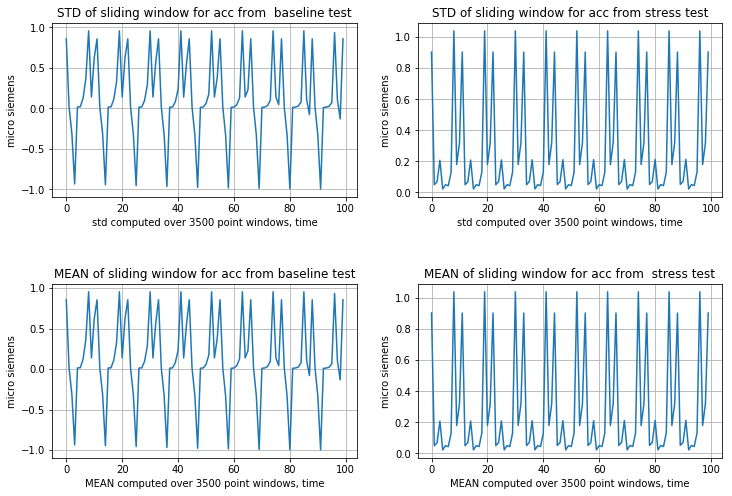

In [8]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax221 = plt.subplot(2, 2, 1)
ax221.plot(list(range_to_plot), acc_features['std'][0:max(range_to_plot)+1])

ax221.set(xlabel='std computed over 3500 point windows, time', ylabel = 'micro siemens',
       title = 'STD of sliding window for acc from  baseline test')
ax221.grid()

ax222 = plt.subplot(2, 2, 2)
ax222.plot(list(range_to_plot), acc_features_stress['std'][0:max(range_to_plot)+1])

ax222.set(xlabel='std computed over 3500 point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for acc from stress test')
ax222.grid()


ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), acc_features['mean'][0:max(range_to_plot)+1])

ax223.set(xlabel='MEAN computed over 3500 point windows, time', ylabel = 'micro siemens',
        title = 'MEAN of sliding window for acc from baseline test')
ax223.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), acc_features_stress['mean'][0:max(range_to_plot)+1])

ax224.set(xlabel='MEAN computed over 3500 point windows, time', ylabel = 'micro siemens',
       title = 'MEAN of sliding window for acc from  stress test')
ax224.grid()
plt.show()

In [9]:
import operator
print("Out of ", len(acc_features['mean']), "values, only " , np.count_nonzero(list(map(operator.sub, acc_features_stress['mean'],  acc_features['mean']))), " are differing for the stress vs baseline values")

Out of  47520 values, only  25520  are differing for the stress vs baseline values


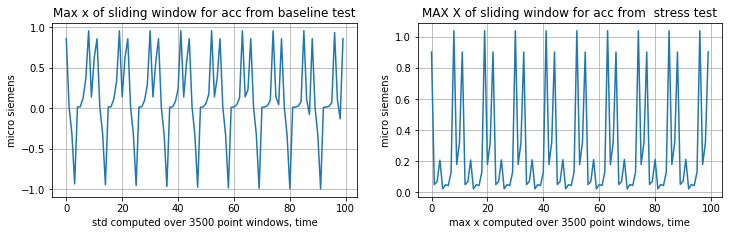

In [10]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), acc_features['maxx'][0:max(range_to_plot)+1])

ax223.set(xlabel='std computed over 3500 point windows, time', ylabel = 'micro siemens',
        title = 'Max x of sliding window for acc from baseline test')
ax223.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), acc_features_stress['maxx'][0:max(range_to_plot)+1])

ax224.set(xlabel='max x computed over 3500 point windows, time', ylabel = 'micro siemens',
       title = 'MAX X of sliding window for acc from  stress test')
ax224.grid()
plt.show()